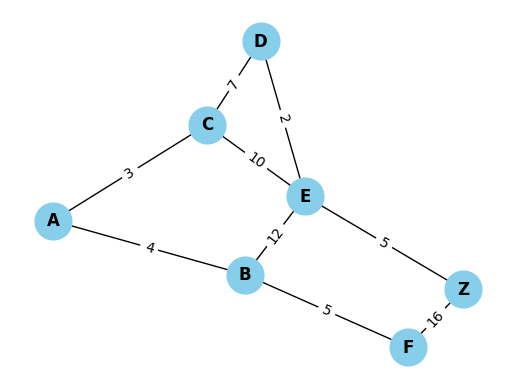

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.backends.backend_tkagg as tkagg
import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox


class dijkstraGUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Dijkstra's Algorithm GUI")

        self.graph = {}  # Inisialisasi graf kosong
        self.valid_graph = False  # Tambahkan variabel boolean
        self.create_widgets()

    def create_widgets(self):
        # Label dan Entry untuk input node dan vertex
        self.label_input = ttk.Label(self.master, text="Masukkan node dan vertex:")
        self.label_input.grid(row=0, column=0, columnspan=3, padx=10, pady=5, sticky="w")

        self.text_input = tk.Text(self.master, height=10, width=30)
        self.text_input.grid(row=1, column=0, columnspan=3, padx=10, pady=5, sticky="nsew")

        # Button untuk membuat graf dari input
        self.create_graph_button = ttk.Button(
            self.master, text="Buat Graf", command=self.create_graph
        )
        self.create_graph_button.grid(row=2, column=0, columnspan=3, pady=10, sticky="nsew")

        # Label dan Entry untuk node awal
        self.label_start_node = ttk.Label(
            self.master, text="Masukkan node awal (initial state):"
        )
        self.label_start_node.grid(row=3, column=0, padx=10, pady=5, sticky="e")
        self.entry_start_node = ttk.Entry(self.master)
        self.entry_start_node.grid(row=3, column=1, padx=10, pady=5, sticky="w")

        # Label dan Entry untuk node tujuan
        self.label_end_node = ttk.Label(
            self.master, text="Masukkan node tujuan (goal state):"
        )
        self.label_end_node.grid(row=4, column=0, padx=10, pady=5, sticky="e")
        self.entry_end_node = ttk.Entry(self.master)
        self.entry_end_node.grid(row=4, column=1, padx=10, pady=5, sticky="w")

        # Frame untuk visualisasi graf
        self.graph_frame = ttk.Frame(self.master)
        self.graph_frame.grid(row=0, column=3, rowspan=5, padx=10, pady=5, sticky="nsew")

        # Button untuk menjalankan algoritma Dijkstra
        self.run_button = ttk.Button(
            self.master, text="Jalankan Dijkstra", command=self.run_dijkstra
        )
        self.run_button.grid(row=5, column=0, columnspan=2, pady=10, sticky="nsew")

        # Button untuk menghapus output
        self.clear_output_button = ttk.Button(
            self.master, text="Hapus Output", command=self.clear_output
        )
        self.clear_output_button.grid(row=5, column=2, pady=10, sticky="nsew")

        # Button untuk keluar dari program
        self.exit_button = ttk.Button(
            self.master, text="Keluar", command=self.master.destroy
        )
        self.exit_button.grid(row=5, column=3, pady=10, sticky="nsew")

        # Widget Text untuk menampilkan output
        self.output_text = tk.Text(self.master, height=10, width=50)
        self.output_text.grid(row=6, column=0, columnspan=4, padx=10, pady=5, sticky="nsew")

        # Konfigurasi untuk membuat frame dan teks area dapat mengikuti perubahan ukuran window
        for row in range(7):
            self.master.grid_rowconfigure(row, weight=1)
        for col in range(4):
            self.master.grid_columnconfigure(col, weight=1)

    def create_graph(self):
        # Membersihkan frame sebelum membuat graf baru
        self.clear_graph_frame()

        # Mengambil input dari teks area dan mengubahnya menjadi graf
        input_text = self.text_input.get("1.0", tk.END).strip()
        graph = self.parse_input(input_text)

        if graph is not None:
            # Visualisasi graf
            self.visualize_graph(graph)
            self.graph = graph  # Update graf setelah input valid
            self.valid_graph = True  # Set variabel boolean menjadi True
        else:
            # Menampilkan pesan peringatan jika input tidak valid
            messagebox.showwarning("Input Tidak Valid", "Mohon periksa kembali input Anda.")
            self.valid_graph = False  # Set variabel boolean menjadi False

    def parse_input(self, input_text):
        graph = {}

        try:
            lines = input_text.split("\n")

            for line in lines:
                parts = line.strip().split()

                node = parts[0]
                edges = [(parts[i], int(parts[i + 1])) for i in range(1, len(parts), 2)]

                if node in graph:
                    # Cek konsistensi jarak antar node pada satu baris
                    for neighbor, weight in edges:
                        if neighbor in graph[node] and graph[node][neighbor] != weight:
                            raise ValueError(f"Kesalahan: Jarak pada node {node} dan {neighbor} tidak konsisten.")
                        graph[node][neighbor] = weight
                else:
                    # Jika node belum ada, tambahkan ke graf
                    graph[node] = dict(edges)

            # Check for consistency in edge weights between two connected nodes
            if not self.check_consistency(graph):
                # Menampilkan pesan peringatan jika input tidak valid
                self.valid_graph = False  # Set variabel boolean menjadi False
                return None  # Tambahkan return untuk menghentikan pembuatan graf jika input tidak valid

            return graph

        except ValueError as e:
            # Menangkap kesalahan dan menampilkan pesan peringatan
            messagebox.showwarning("Input Tidak Valid", str(e))
            return None

    def check_consistency(self, graph):
        # Helper function to check consistency in edge weights between two connected nodes
        for node, neighbors in graph.items():
            for neighbor, weight in neighbors.items():
                reverse_weight = self.get_edge_weight(graph, neighbor, node)
                if reverse_weight is not None and reverse_weight != weight:
                    return False
        return True

    def get_edge_weight(self, graph, node1, node2):
        # Helper function to get the weight of an edge between two nodes
        if node1 in graph and node2 in graph[node1]:
            return graph[node1][node2]
        return None

    def clear_graph_frame(self):
        # Membersihkan frame graf
        for widget in self.graph_frame.winfo_children():
            widget.destroy()

    def visualize_graph(self, graph):
        G = nx.Graph()
        for node, neighbors in graph.items():
            for neighbor, weight in neighbors.items():
                G.add_edge(node, neighbor, weight=weight)

        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, "weight")

        ax = plt.figure().add_subplot(111)
        nx.draw(
            G,
            pos,
            with_labels=True,
            font_weight="bold",
            node_size=700,
            node_color="skyblue",
            ax=ax,
        )
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

        # Menggunakan FigureCanvasTkAgg dengan frame yang sudah dibersihkan
        canvas = tkagg.FigureCanvasTkAgg(ax.figure, master=self.graph_frame)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def run_dijkstra(self):
        if not self.valid_graph:
            # Tampilkan pesan peringatan jika graf tidak valid
            messagebox.showwarning("Graf Tidak Valid", "Graf tidak valid. Mohon buat graf yang valid.")
            return

        start_node = self.entry_start_node.get().upper()
        end_node = self.entry_end_node.get().upper()

        if not start_node or not end_node:
            error_message = "Mohon masukkan node awal dan tujuan."
            messagebox.showwarning("Input Tidak Valid", error_message)
            return

        if start_node not in self.graph or end_node not in self.graph:
            error_message = "Node awal atau tujuan tidak ditemukan dalam graf."
            messagebox.showwarning("Input Tidak Valid", error_message)
            return

        shortest_distance, shortest_path = self.dijkstra(self.graph, start_node, end_node)
        result_message = (
            f"Jarak terpendek dari {start_node} ke {end_node}: {shortest_distance}\n"
            f"Jalur terpendek: {shortest_path}\n"
        )
        self.output_text.insert(tk.END, result_message)

    def dijkstra(self, graph, start, end):
        distances = {node: float("inf") for node in graph}
        distances[start] = 0
        pq = [(0, start)]
        previous_nodes = {node: None for node in graph}

        iteration = 0

        while len(pq) > 0:
            distance, node = heapq.heappop(pq)

            if distance > distances[node]:
                continue

            iteration += 1
            self.visualize_table(iteration, distances, previous_nodes, graph.keys())

            for neighbor, weight in graph[node].items():
                new_dist = distance + weight
                if new_dist < distances[neighbor]:
                    distances[neighbor] = new_dist
                    heapq.heappush(pq, (new_dist, neighbor))
                    previous_nodes[neighbor] = node

        path = []
        current_node = end
        while current_node is not None:
            path.insert(0, current_node)
            current_node = previous_nodes[current_node]

        return distances[end], path

    def visualize_table(self, iteration, distances, previous_nodes, nodes):
        table_data = {
            "Node": nodes,
            "Distance": [distances[node] for node in nodes],
            "Previous Node": [previous_nodes[node] for node in nodes],
        }
        df = pd.DataFrame(table_data)
        iteration_message = f"Iterasi {iteration}:\n{df}\n{'-' * 30}\n"
        self.output_text.insert(tk.END, iteration_message)

    def clear_output(self):
        # Membersihkan teks di output_text
        self.output_text.delete("1.0", tk.END)


root = tk.Tk()
app = dijkstraGUI(root)
root.mainloop()


In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.backends.backend_tkagg as tkagg
import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox

class DijkstraGUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Dijkstra's Algorithm GUI")

        self.graph = {}  # Inisialisasi graf kosong
        self.valid_graph = False  # Tambahkan variabel boolean
        self.create_widgets()

    def create_widgets(self):
        # Label dan Entry untuk input node dan vertex
        self.label_input = ttk.Label(self.master, text="Masukkan node dan vertex:")
        self.label_input.grid(row=0, column=0, columnspan=3, padx=10, pady=5)

        self.text_input = tk.Text(self.master, height=10, width=30)
        self.text_input.grid(row=1, column=0, columnspan=3, padx=10, pady=5)

        # Button untuk membuat graf dari input
        self.create_graph_button = ttk.Button(
            self.master, text="Buat Graf", command=self.create_graph
        )
        self.create_graph_button.grid(row=2, column=0, columnspan=3, pady=10)

        # Label dan Entry untuk node awal
        self.label_start_node = ttk.Label(
            self.master, text="Masukkan node awal (initial state):"
        )
        self.label_start_node.grid(row=3, column=0, padx=10, pady=5)
        self.entry_start_node = ttk.Entry(self.master)
        self.entry_start_node.grid(row=3, column=1, padx=10, pady=5)

        # Label dan Entry untuk node tujuan
        self.label_end_node = ttk.Label(
            self.master, text="Masukkan node tujuan (goal state):"
        )
        self.label_end_node.grid(row=4, column=0, padx=10, pady=5)
        self.entry_end_node = ttk.Entry(self.master)
        self.entry_end_node.grid(row=4, column=1, padx=10, pady=5)

        # Frame untuk visualisasi graf
        self.graph_frame = ttk.Frame(self.master)
        self.graph_frame.grid(row=0, column=3, rowspan=5, padx=10, pady=5)

        # Button untuk menjalankan algoritma Dijkstra
        self.run_button = ttk.Button(
            self.master, text="Jalankan Dijkstra", command=self.run_dijkstra
        )
        self.run_button.grid(row=5, column=0, columnspan=2, pady=10)

        # Button untuk mencari rute terpendek yang mengunjungi semua node
        self.find_optimal_route_button = ttk.Button(
            self.master, text="Cari Rute Terpendek (Visit All Nodes)", command=self.find_optimal_route
        )
        self.find_optimal_route_button.grid(row=5, column=2, columnspan=2, pady=10)

        # Label untuk hasil rute terpendek yang mengunjungi semua node
        self.label_optimal_route = ttk.Label(
            self.master, text="Rute terpendek yang mengunjungi semua node:"
        )
        self.label_optimal_route.grid(row=6, column=0, columnspan=2, padx=10, pady=5)

        # Entry untuk menampilkan hasil rute terpendek yang mengunjungi semua node
        self.entry_optimal_route = ttk.Entry(self.master, state="readonly")
        self.entry_optimal_route.grid(row=6, column=2, columnspan=2, padx=10, pady=5)

        # Button untuk menghapus output
        self.clear_output_button = ttk.Button(
            self.master, text="Hapus Output", command=self.clear_output
        )
        self.clear_output_button.grid(row=7, column=0, columnspan=2, pady=10)

        # Button untuk keluar dari program
        self.exit_button = ttk.Button(
            self.master, text="Keluar", command=self.master.destroy
        )
        self.exit_button.grid(row=7, column=2, columnspan=2, pady=10)

        # Widget Text untuk menampilkan output
        self.output_text = tk.Text(self.master, height=10, width=50)
        self.output_text.grid(row=8, column=0, columnspan=4, padx=10, pady=5, sticky="nsew")

        # Konfigurasi untuk membuat frame dan teks area dapat mengikuti perubahan ukuran window
        for row in range(9):
            self.master.grid_rowconfigure(row, weight=1)
        for col in range(4):
            self.master.grid_columnconfigure(col, weight=1)

    def create_graph(self):
        # Membersihkan frame sebelum membuat graf baru
        self.clear_graph_frame()

        # Mengambil input dari teks area dan mengubahnya menjadi graf
        input_text = self.text_input.get("1.0", tk.END).strip()
        graph = self.parse_input(input_text)

        if graph is not None:
            # Visualisasi graf
            self.visualize_graph(graph)
            self.graph = graph  # Update graf setelah input valid
            self.valid_graph = True  # Set variabel boolean menjadi True
        else:
            # Menampilkan pesan peringatan jika input tidak valid
            messagebox.showwarning("Input Tidak Valid", "Mohon periksa kembali input Anda.")
            self.valid_graph = False  # Set variabel boolean menjadi False

    def parse_input(self, input_text):
        graph = {}

        try:
            lines = input_text.split("\n")

            for line in lines:
                parts = line.strip().split()

                node = parts[0]
                edges = [(parts[i], int(parts[i + 1])) for i in range(1, len(parts), 2)]

                if node in graph:
                    # Cek konsistensi jarak antar node pada satu baris
                    for neighbor, weight in edges:
                        if neighbor in graph[node] and graph[node][neighbor] != weight:
                            raise ValueError(f"Kesalahan: Jarak pada node {node} dan {neighbor} tidak konsisten.")
                        graph[node][neighbor] = weight
                else:
                    # Jika node belum ada, tambahkan ke graf
                    graph[node] = dict(edges)

            # Check for consistency in edge weights between two connected nodes
            if not self.check_consistency(graph):
                # Menampilkan pesan peringatan jika input tidak valid
                self.valid_graph = False  # Set variabel boolean menjadi False
                return None  # Tambahkan return untuk menghentikan pembuatan graf jika input tidak valid

            return graph

        except ValueError as e:
            # Menangkap kesalahan dan menampilkan pesan peringatan
            messagebox.showwarning("Input Tidak Valid", str(e))
            return None

    def check_consistency(self, graph):
        # Helper function to check consistency in edge weights between two connected nodes
        for node, neighbors in graph.items():
            for neighbor, weight in neighbors.items():
                reverse_weight = self.get_edge_weight(graph, neighbor, node)
                if reverse_weight is not None and reverse_weight != weight:
                    return False
        return True

    def get_edge_weight(self, graph, node1, node2):
        # Helper function to get the weight of an edge between two nodes
        if node1 in graph and node2 in graph[node1]:
            return graph[node1][node2]
        return None

    def clear_graph_frame(self):
        # Membersihkan frame graf
        for widget in self.graph_frame.winfo_children():
            widget.destroy()

    def visualize_graph(self, graph):
        G = nx.Graph()
        for node, neighbors in graph.items():
            for neighbor, weight in neighbors.items():
                G.add_edge(node, neighbor, weight=weight)

        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, "weight")

        ax = plt.figure().add_subplot(111)
        nx.draw(
            G,
            pos,
            with_labels=True,
            font_weight="bold",
            node_size=700,
            node_color="skyblue",
            ax=ax,
        )
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

        canvas = tkagg.FigureCanvasTkAgg(ax.figure, master=self.graph_frame)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def run_dijkstra(self):
        if not self.valid_graph:
            # Tampilkan pesan peringatan jika graf tidak valid
            messagebox.showwarning("Graf Tidak Valid", "Graf tidak valid. Mohon buat graf yang valid.")
            return

        start_node = self.entry_start_node.get().upper()
        end_node = self.entry_end_node.get().upper()

        if not start_node or not end_node:
            error_message = "Mohon masukkan node awal dan tujuan."
            messagebox.showwarning("Input Tidak Valid", error_message)
            return

        if start_node not in self.graph or end_node not in self.graph:
            error_message = "Node awal atau tujuan tidak ditemukan dalam graf."
            messagebox.showwarning("Input Tidak Valid", error_message)
            return

        shortest_distance, shortest_path = self.dijkstra(self.graph, start_node, end_node)
        result_message = (
            f"Jarak terpendek dari {start_node} ke {end_node}: {shortest_distance}\n"
            f"Jalur terpendek: {shortest_path}\n"
        )
        self.output_text.insert(tk.END, result_message)

    def dijkstra(self, graph, start, end):
        distances = {node: float("inf") for node in graph}
        distances[start] = 0
        pq = [(0, start)]
        previous_nodes = {node: None for node in graph}

        iteration = 0

        while len(pq) > 0:
            distance, node = heapq.heappop(pq)

            if distance > distances[node]:
                continue

            iteration += 1
            self.visualize_table(iteration, distances, previous_nodes, graph.keys())

            for neighbor, weight in graph[node].items():
                new_dist = distance + weight
                if new_dist < distances[neighbor]:
                    distances[neighbor] = new_dist
                    heapq.heappush(pq, (new_dist, neighbor))
                    previous_nodes[neighbor] = node

        path = []
        current_node = end
        while current_node is not None:
            path.insert(0, current_node)
            current_node = previous_nodes[current_node]

        return distances[end], path

    def visualize_table(self, iteration, distances, previous_nodes, nodes):
        table_data = {
            "Node": nodes,
            "Distance": [distances[node] for node in nodes],
            "Previous Node": [previous_nodes[node] for node in nodes],
        }
        df = pd.DataFrame(table_data)
        print(f"Iterasi {iteration}:")
        print(df)
        print("-" * 30)

  
    def find_optimal_route(self):
        start_node = self.entry_start_node.get().upper()

        if not start_node:
            messagebox.showwarning("Input Tidak Valid", "Mohon masukkan node awal.")
            return

        if start_node not in self.graph:
            messagebox.showwarning("Input Tidak Valid", "Node awal tidak ditemukan dalam graf.")
            return

        optimal_route, total_distance = self.tsp_dijkstra(self.graph, start_node)
        result_message = (
            f"Rute terpendek yang mengunjungi semua node: {optimal_route}\n"
            f"Total Jarak: {total_distance}\n"
        )
        self.output_text.insert(tk.END, result_message)

        self.entry_optimal_route.config(state="normal")
        self.entry_optimal_route.delete(0, tk.END)
        self.entry_optimal_route.insert(0, optimal_route)
        self.entry_optimal_route.config(state="readonly")

    def tsp_dijkstra(self, graph, start):
        all_nodes = set(graph.keys())
        current_node = start
        unvisited_nodes = set(all_nodes - {current_node})
        path = [current_node]

        total_distance = 0  # Inisialisasi total_distance

        while unvisited_nodes:
            neighbors = [(neighbor, weight) for neighbor, weight in graph[current_node].items() if neighbor in unvisited_nodes]

            if not neighbors:
                break

            next_node, min_distance = min(neighbors, key=lambda x: x[1])  # Pilih tetangga dengan jarak terpendek
            unvisited_nodes.remove(next_node)
            path.append(next_node)
            total_distance += min_distance  # Tambahkan bobot ke total_distance
            current_node = next_node

        # Kembalikan ke node awal untuk menyelesaikan sirkuit
        path.append(start)

        return path, total_distance

    def clear_output(self):
        # Menghapus teks pada widget output
        self.output_text.delete(1.0, tk.END)

# Inisialisasi dan jalankan aplikasi GUI
root = tk.Tk()
app = DijkstraGUI(root)
root.mainloop()